In [1]:
import sift
import numpy as np
from scipy.stats import median_abs_deviation

# Create or load parameter file

In [2]:
parameters = sift.parameters("")
parameters.create_parameter_file(cmb_resolution = 3.0, realizations=100)

/home/bolocam/erapaport/Spectro_Imaging_Forecasting_Tool/parameter_creation.py:39: RuntimeWarning: invalid value encountered in true_divide
  ClTT = DlTT * 2 * np.pi / (ell * (ell + 1.))


# View Differential Intensity Projection

In [2]:
y = 5.4e-05
electron_temperature = 5.0 # KeV
peculiar_vel = 1e-11 # km/s
time = 288000 # Seconds
sides_long = 100
sides_lat = 100

In [3]:
hybrid_band = sift.bands.hybrid()

In [4]:
siftsim = sift.simulation(y, electron_temperature, peculiar_vel, hybrid_band, time)

 Loading CNSN 2012 basis functions (CMB frame). This will only be done once. 


/home/eitanrapa/Documents/GitHub/Spectro-Imaging-Forecasting-Tool/pkg/sift/Simulation.py:151: RuntimeWarning: divide by zero encountered in log
  f = interp1d(x=np.log(datax), y=np.log(datay), kind='slinear', bounds_error=False, fill_value=0)


TypeError: list indices must be integers or slices, not str

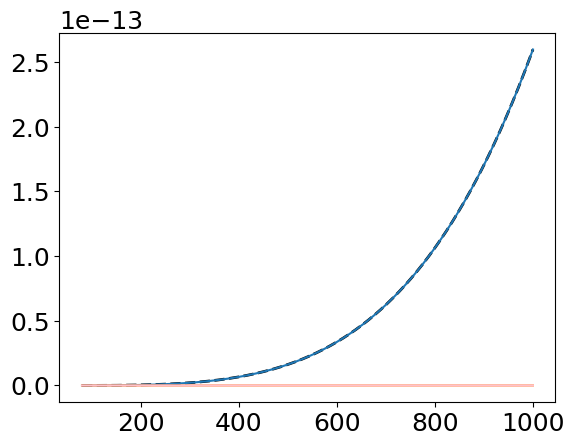

In [5]:
siftsim.differential_intensity_projection()

# Run Script

In [8]:
siftclass.run_sim(file_name='run_1.npy', parameter_file='parameter_file_100.npy', processors_pool=30, realizations=1)

/home/bolocam/erapaport/Spectro_Imaging_Forecasting_Tool/SIFT_classes.py:210: RuntimeWarning: divide by zero encountered in log
  f = interp1d(x=np.log(datax), y=np.log(datay), kind='slinear', bounds_error=False, fill_value=0)
100%|██████████| 12000/12000 [04:24<00:00, 45.42it/s]


# Analyze output

In [7]:
siftproj = sift.projection('/home/eitanrapa/Documents/projects/runs/')
fig, data = siftproj.contour_plot_projection('run_1.npy')

ModuleNotFoundError: No module named 'SIFT_classes'

In [6]:
median_abs_deviation(data[:,2])

971.3348850200878

In [ ]:
proj.chain_projection('test_run_1.npy')

/data/bolocam/bolocam/erapaport/python/SIFTSenv02/lib64/python3.6/site-packages/pygtc/pygtc.py:1264: UserWarning: No contour levels were found within the data range.
  linewidths=1, colors=colors[k][l])
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


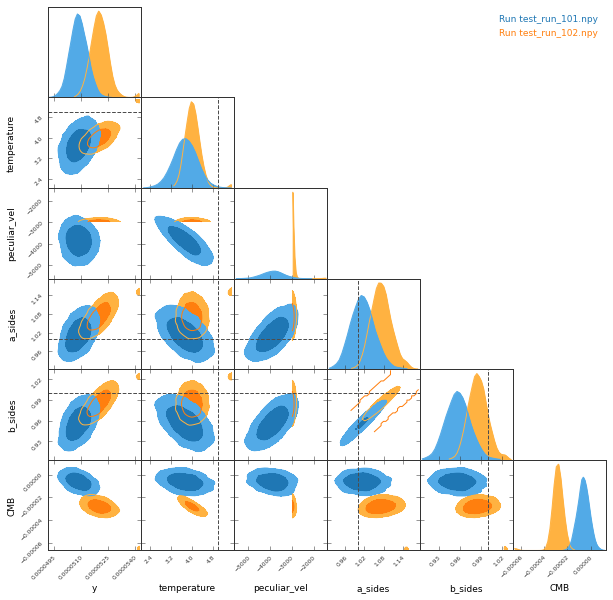

(<Figure size 720x720 with 22 Axes>,
 array([[ 5.11653660e-05,  3.53130320e+00, -3.49316909e+03,
          1.04786962e+00,  9.72401070e-01, -9.06395858e-06],
        [ 5.10121161e-05,  3.82234412e+00, -4.06498779e+03,
          1.02708060e+00,  9.62151501e-01, -3.95546523e-06],
        [ 5.01265126e-05,  3.23034601e+00, -3.63440869e+03,
          9.87663631e-01,  9.44006541e-01, -8.55728656e-07],
        ...,
        [ 5.08677825e-05,  4.13554077e+00, -4.28998340e+03,
          9.84876693e-01,  9.43330190e-01, -7.08131121e-06],
        [ 5.07849779e-05,  4.29262641e+00, -4.37343543e+03,
          9.60709314e-01,  9.32427122e-01, -9.03878312e-06],
        [ 5.07368245e-05,  4.22555492e+00, -4.19333889e+03,
          9.62264595e-01,  9.33211497e-01, -1.12258570e-05]]),
 array([[ 5.22263842e-05,  4.10644453e+00, -2.90663051e+03,
          1.08523811e+00,  9.90875499e-01, -3.04248322e-05],
        [ 5.17931153e-05,  4.24444546e+00, -2.98139083e+03,
          1.03526442e+00,  9.69017691e-01

In [8]:
proj.contour_plot_double_projection('test_run_101.npy', 'test_run_102.npy')